Adapted from [https://github.com/PacktPublishing/Bioinformatics-with-Python-Cookbook-Second-Edition](https://github.com/PacktPublishing/Bioinformatics-with-Python-Cookbook-Second-Edition), Chapter 2.

# Getting the necessary packages

```
conda config --add channels bioconda
conda install samtools pysam
```

# Getting the necessary data

You just need to do this only once

In [1]:
!rm -f data/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam 2>/dev/null
!rm -f data/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam.bai 2>/dev/null
# BAM is the alignment file and BAI is the index, generated by samtools
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam.bai
!mv *bam *bai data

--2020-04-23 14:27:44--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam
           => «NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam»
S'està resolent ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)… 193.62.197.77
S'està connectant a ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.197.77|:21… connectat.
S'està entrant com a «anonymous» … S'ha entrat amb èxit!
==> SYST ... fet.     ==> PWD ... fet.
==> TYPE I ... fet.   ==> CWD (1) /vol1/ftp/phase3/data/NA18489/exome_alignment ... fet.
==> SIZE NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam ... 327067172
==> PASV ... fet.     ==> RETR NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam ... fet.
Mida: 327067172 (312M) (no autoritatiu)

NA18489.chrom20.ILL 100%[===================>] 311,92M  1,20MB/s    in 6m 23s  

2020-04-23 14:34:08 (835 KB/s) - s'ha desat «NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam» [327067172]

--20

# The recipe

In [3]:
#pip install pysam
from collections import defaultdict

import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pysam

In [5]:
bam = pysam.AlignmentFile('data/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam', 'rb')

In [7]:
headers = bam.header
for record_type, records in headers.items():
    print (record_type)
    for i, record in enumerate(records):
        if type(record) == dict:
            print('\t%d' % (i + 1))
            for field, value in record.items():
                print('\t\t%s\t%s' % (field, value))
        else:
            print('\t\t%s' % record)

HD
		VN
		SO
SQ
	1
		SN	1
		LN	249250621
		M5	1b22b98cdeb4a9304cb5d48026a85128
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	2
		SN	2
		LN	243199373
		M5	a0d9851da00400dec1098a9255ac712e
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	3
		SN	3
		LN	198022430
		M5	fdfd811849cc2fadebc929bb925902e5
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	4
		SN	4
		LN	191154276
		M5	23dccd106897542ad87d2765d28a19a1
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	5
		SN	5
		LN	180915260
		M5	0740173db9ffd264d728f32784845cd7
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_as

check the meaning of [paired-end reads](https://www.illumina.com/science/technology/next-generation-sequencing/plan-experiments/paired-end-vs-single-read.html)

In [10]:
# pysam is 0-based
for rec in bam:
    if rec.cigarstring.find('M') > -1 and rec.cigarstring.find('S') > -1 and not rec.is_unmapped and not rec.mate_is_unmapped:
        break

print('query template name and ID')
print(rec.query_name, rec.reference_id, bam.getrname(rec.reference_id), rec.reference_start, rec.reference_end)
print('CIGAR string (indicates how many mapped bases. How many bases per read here?)')
print(rec.cigarstring)
print('position and length of the alignment')
print(rec.query_alignment_start, rec.query_alignment_end, rec.query_alignment_length)
print('info for the paired end')
print(rec.next_reference_id, rec.next_reference_start, rec.template_length)
print(rec.is_paired, rec.is_proper_pair, rec.is_unmapped, rec.mapping_quality)
print('Phred score for mapped and complete sequence')
print(rec.query_qualities)
print(rec.query_alignment_qualities)
print('Finally, the complete sequence of this read')
print(rec.query_sequence)

query template name and ID
SRR100025.29222641 19 20 60074 60134
CIGAR string (indicates how many mapped bases. How many bases per read here?)
16S60M
position and length of the alignment
16 76 60
info for the paired end
19 60056 -77
True True False 60
Phred score for mapped and complete sequence
array('B', [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 34, 30, 39, 37, 38, 28, 34, 32, 37, 24, 34, 36, 36, 19, 34, 38, 37, 36, 37, 21, 37, 36, 37, 25, 28, 31, 35, 37, 37, 38, 31, 33, 39, 34, 34, 38, 39, 37, 38, 34, 26, 33, 32, 39, 29, 39, 26, 36, 10, 37, 37, 39, 31, 37, 38, 30, 30, 33, 31])
array('B', [2, 34, 30, 39, 37, 38, 28, 34, 32, 37, 24, 34, 36, 36, 19, 34, 38, 37, 36, 37, 21, 37, 36, 37, 25, 28, 31, 35, 37, 37, 38, 31, 33, 39, 34, 34, 38, 39, 37, 38, 34, 26, 33, 32, 39, 29, 39, 26, 36, 10, 37, 37, 39, 31, 37, 38, 30, 30, 33, 31])
Finally, the complete sequence of this read
ACCAGATCCTGCCCCTAAACAGGTGGTAAGGAAGGAGAGAGTGAAGGAACTGCCAGGTGACACACTCCCACCATGG


Now, let us plot the distribution of the successfully mapped positions in a subset of sequences in the BAM file. we will use only the positions between 0 and 10Mbp of chromosome 20. Mappability is not homogeneous!

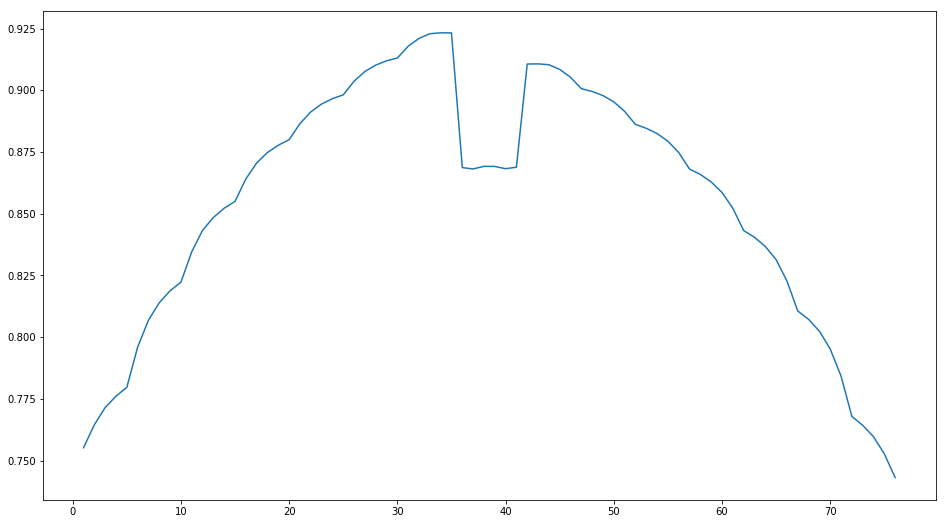

In [11]:
counts = [0] * 76
for n, rec in enumerate(bam.fetch('20', 0, 10000000)):
    for i in range(rec.query_alignment_start, rec.query_alignment_end):
        counts[i] += 1
freqs = [x / (n + 1.) for x in counts]
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(range(1, 77), freqs)

In [12]:
phreds = defaultdict(list)
for rec in bam.fetch('20', 0, None):
    for i in range(rec.query_alignment_start, rec.query_alignment_end):
        phreds[i].append(rec.query_qualities[i])

In [13]:
maxs = [max(phreds[i]) for i in range(76)]
tops = [np.percentile(phreds[i], 95) for i in range(76)]
medians = [np.percentile(phreds[i], 50) for i in range(76)]
bottoms = [np.percentile(phreds[i], 5) for i in range(76)]
medians_fig = [x - y for x, y in zip(medians, bottoms)]
tops_fig = [x - y for x, y in zip(tops, medians)]
maxs_fig = [x - y for x, y in zip(maxs, tops)]

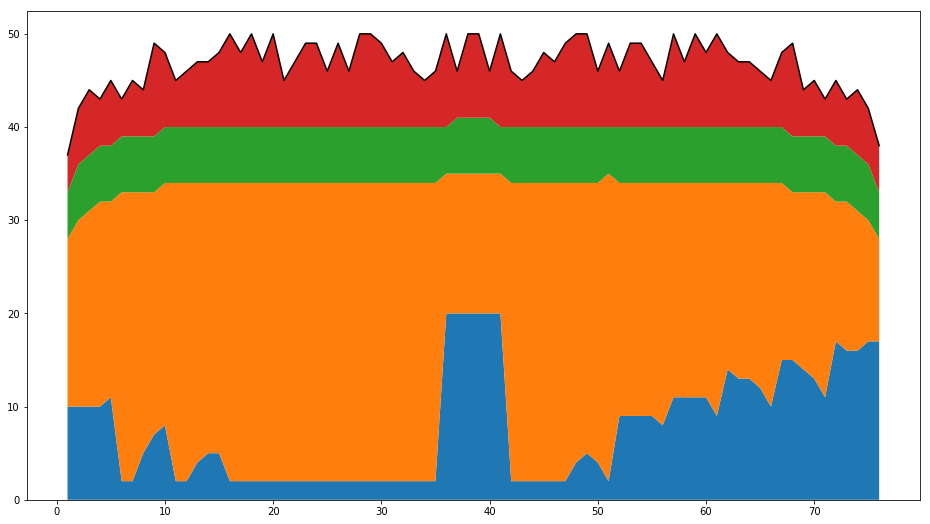

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
ax.stackplot(range(1, 77), (bottoms, medians_fig, tops_fig, maxs_fig))
ax.plot(range(1, 77), maxs, 'k-')